In [57]:
import pandas as pd
import numpy as np
import random
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
#pd.pandas.set_option('display.max_columns', None)
#pd.pandas.set_option('display.width', 300)

In [2]:
anime_ = pd.read_csv("anime.csv")

In [3]:
anime = anime_.copy()

In [4]:
rating_ = pd.read_csv("rating.csv")
rating = rating_.copy()

In [5]:
def general_info (dataframe):
    print(15*"-","Shape",15*"-")
    print(dataframe.shape,"\n")
    print(15*"-","Variable Types",15*"-")
    print(dataframe.info(),"\n")
    print(15*"-","Statistics",15*"-")
    print(dataframe.describe().T,"\n")
    print(15*"-","Null Value",15*"-")
    print(dataframe.isnull().sum(),"\n")

In [6]:
general_info(anime)

--------------- Shape ---------------
(12294, 7) 

--------------- Variable Types ---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None 

--------------- Statistics ---------------
            count          mean           std   min      25%       50%  \
anime_id  12294.0  14058.221653  11455.294701  1.00  3484.25  10260.50   
rating    12064.0      6.473902      1.026746  1.67     5.88      6.57   
members   12294.0  18071.338864  54820.676925  5.00   225.00   1550.00   

               75%        max  


In [7]:
rating[rating["rating"] == -1].count()

user_id     1476496
anime_id    1476496
rating      1476496
dtype: int64

In [8]:
# merge two datasets which other based on 'anime_id'
anime_ratings = rating.merge(anime[["anime_id", "name"]], how = "inner" , on = "anime_id")

In [9]:
anime_ratings.head()

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,3,20,8,Naruto
2,5,20,6,Naruto
3,6,20,-1,Naruto
4,10,20,-1,Naruto


In [10]:
anime_ratings = anime_ratings[anime_ratings["rating"] >= 0]

In [11]:
anime_df = anime_ratings.pivot_table(index = "user_id", columns = "name", values = "rating")

In [14]:
anime_df.head()

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
random_user = random.choice(anime_df.index)
print(random_user)

11845


In [36]:
random_user_df = anime_df[anime_df.index == random_user]
random_user_df.shape

(1, 9926)

In [66]:
random_user_df.T

user_id,11845
name,
&quot;0&quot;,NaN
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",NaN
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,NaN
&quot;Bungaku Shoujo&quot; Memoire,NaN
&quot;Bungaku Shoujo&quot; Movie,NaN
...,...
xxxHOLiC Kei,NaN
xxxHOLiC Movie: Manatsu no Yoru no Yume,NaN
xxxHOLiC Rou,NaN


In [38]:
# the animes have been watched by random user
anime_watched = random_user_df.columns[random_user_df.notna().any()].to_list()
anime_watched[0:10]

['Ao no Exorcist',
 'Ao no Exorcist Movie',
 'Ao no Exorcist: Kuro no Iede',
 'Bakuman.',
 'Bakuman. 2nd Season',
 'Bakuman. 3rd Season',
 'Blood+',
 'Btooom!',
 'Death Note',
 'Durarara!!']

In [39]:
# the numbers of anime that is watched
len(anime_watched)

41

In [40]:
anime_watched_df = anime_df[anime_watched]
anime_watched_df.shape

(69600, 41)

In [41]:
anime_movie_count = anime_watched_df.T.notnull().sum()
anime_movie_count = anime_movie_count.reset_index()
anime_movie_count.columns = ["user_id", "anime_count"]
anime_movie_count.head()

,user_id,anime_count
0,1,1
1,2,0
2,3,12
3,5,18
4,7,9


In [69]:
anime_movie_count.describe([0.5,0.75,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,75%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,max
user_id,69600.0,36781.055158,21212.885563,1.0,36811.5,55128.25,66147.1,66879.09,67598.08,68325.07,69062.12,69821.05,70570.04,71303.03,72040.02,72787.01,73516.0
anime_count,69600.0,6.841868,6.415112,0.0,5.0,10.00,16.0,17.00,17.00,18.00,19.00,20.00,21.00,22.00,24.00,26.00,41.0


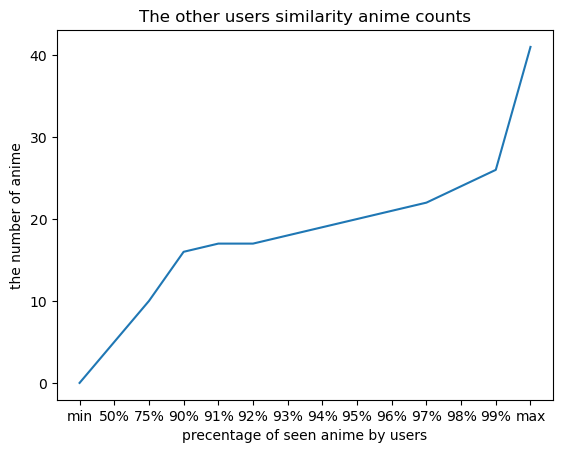

In [67]:
plt.title('The other users similarity anime counts')
plt.ylabel('the number of anime')
plt.xlabel('precentage of seen anime by users')
plt.plot(plott['anime_count'][3:])

In [43]:
perc = len(anime_watched) * 25 / 100
users_same_movies = anime_movie_count[anime_movie_count["anime_count"] > perc]["user_id"]
len(users_same_movies)

17237

In [44]:
final_df = anime_watched_df[anime_watched_df.index.isin(users_same_movies)]
final_df.shape

(17237, 41)

In [45]:
final_df.head()

name,Ao no Exorcist,Ao no Exorcist Movie,Ao no Exorcist: Kuro no Iede,Bakuman.,Bakuman. 2nd Season,Bakuman. 3rd Season,Blood+,Btooom!,Death Note,Durarara!!,...,Shingeki no Kyojin,Soul Eater,Steins;Gate,Steins;Gate: Oukoubakko no Poriomania,Sword Art Online,Sword Art Online: Extra Edition,Tonari no Kaibutsu-kun,Tonari no Totoro,Toradora!,Zankyou no Terror
user_id,,,,,,,,,,,,,,,,,,,,,
3,8.0,7.0,NaN,NaN,NaN,NaN,NaN,8.0,10.0,NaN,...,10.0,8.0,NaN,NaN,9.0,5.0,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,5.0,5.0,NaN,2.0,NaN,4.0,7.0,...,NaN,5.0,9.0,8.0,1.0,NaN,2.0,NaN,3.0,NaN
11,NaN,NaN,NaN,7.0,7.0,7.0,NaN,NaN,NaN,NaN,...,9.0,NaN,7.0,NaN,8.0,NaN,NaN,8.0,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,7.0,...,9.0,NaN,10.0,NaN,7.0,NaN,NaN,NaN,7.0,7.0
21,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,8.0,7.0,NaN,NaN,NaN,NaN,7.0,9.0,8.0,10.0


In [46]:
corr_df = final_df.T.corr().unstack().sort_values()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df.head()

,user_id_1,user_id_2,corr
0,60967,43285,-1.0
1,32011,9384,-1.0
2,63154,31665,-1.0
3,49454,14933,-1.0
4,5504,3014,-1.0


In [47]:
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.50)][["user_id_2", "corr"]].reset_index(drop=True)
top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_id_2": "user_id"}, inplace=True)
top_users.shape

(4676, 2)

In [48]:
top_users.head()

,user_id,corr
4675,11845,1.000000
4674,2097,0.977798
4673,43516,0.943154
4672,13297,0.938315
4671,25716,0.937672


In [49]:
top_users_ratings = top_users.merge(anime_ratings[["user_id", "anime_id", "rating"]], how='inner')
top_users_ratings = top_users_ratings[top_users_ratings["user_id"] != random_user]
top_users_ratings["user_id"].unique()
top_users_ratings.head()

,user_id,corr,anime_id,rating
41,2097,0.977798,355,8
42,2097,0.977798,2001,9
43,2097,0.977798,4224,8
44,2097,0.977798,9919,8
45,2097,0.977798,11757,7


In [50]:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings.head()

,user_id,corr,anime_id,rating,weighted_rating
41,2097,0.977798,355,8,7.822385
42,2097,0.977798,2001,9,8.800183
43,2097,0.977798,4224,8,7.822385
44,2097,0.977798,9919,8,7.822385
45,2097,0.977798,11757,7,6.844587


In [51]:
recommendation_df = top_users_ratings.groupby('anime_id').agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df.head()

,anime_id,weighted_rating
0,1,5.578030
1,5,5.218865
2,6,5.167371
3,7,4.457644
4,8,4.180217


In [52]:
recommendation_df[recommendation_df["weighted_rating"] > 5]
movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 5].sort_values("weighted_rating", ascending=False)

In [53]:
recommendation = movies_to_be_recommend.merge(anime[["anime_id", "name","rating"]])[["name","rating"]][0:10]
recommendation

,name,rating
0,Manga Hajimete Monogatari,6.36
1,Kemono no Souja Erin: Soushuuhen,7.14
2,Gedou Gakuen,6.05
3,Gekitou! Crush Gear Turbo: Kaizabaan no Chousen,6.65
4,"Eikoku Ikka, Nihon wo Taberu",6.43
5,Takara-sagashi,6.68
6,Onegai! Samia Don,7.14
7,Tistou Midori no Oyayubi,7.10
8,Inochi no Chikyuu: Dioxin no Natsu,6.73
9,Chocchan Monogatari,6.81


In [54]:
recommendation.to_csv("recommendation.csv",index=False)

In [76]:
import seaborn as sns

D:\Anaconda\Documents\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
D:\Anaconda\Documents\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [89]:
anime2 = anime_.copy()

In [99]:
anime2.drop(['anime_id','name','genre'],axis=1,inplace=True)

In [100]:
anime2.isnull().sum()

type         25
episodes      0
rating      230
members       0
dtype: int64

In [104]:
anime2.drop(anime2.loc[anime2.isnull().sum(axis=1)>0].index, inplace=True)

In [105]:
anime2.isnull().sum()

type        0
episodes    0
rating      0
members     0
dtype: int64

In [106]:
anime2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12064 entries, 0 to 12293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   type      12064 non-null  object 
 1   episodes  12064 non-null  object 
 2   rating    12064 non-null  float64
 3   members   12064 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 471.2+ KB


In [108]:
anime2['episodes'] = anime2['episodes'].replace('Unknown', 0)
anime2['episodes'] = anime2['episodes'].astype(float)

In [88]:
type_n = anime2.type.groupby(anime2.type).count().index
type_v = anime2.type.groupby(anime2.type).count().values

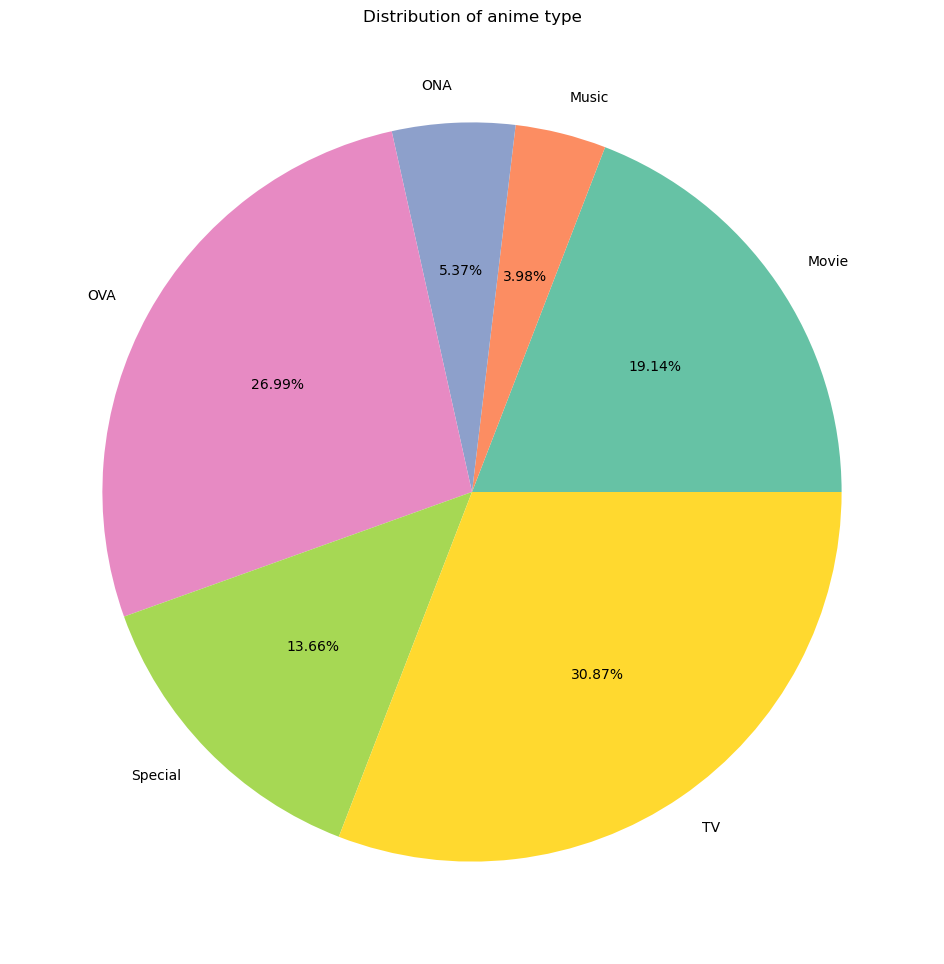

In [85]:
colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(type_v,
        labels=type_n,
        colors=colors,
        autopct='%0.2f%%')
plt.title('Distribution of anime type')
plt.show()

In [110]:
anime2.describe()

,episodes,rating,members
count,12064.000000,12064.000000,1.206400e+04
mean,12.253316,6.473902,1.827952e+04
std,46.668767,1.026746,5.527578e+04
min,0.000000,1.670000,1.200000e+01
25%,1.000000,5.880000,2.210000e+02
50%,2.000000,6.570000,1.539000e+03
75%,12.000000,7.180000,9.485500e+03
max,1818.000000,10.000000,1.013917e+06


D:\Anaconda\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Rating distribution'}, xlabel='rating'>

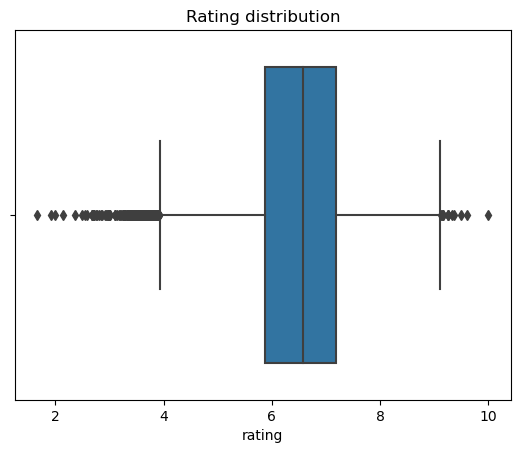

In [114]:
plt.title('Rating distribution')
sns.boxplot(anime2.rating)

In [115]:
anime2.type.value_counts()

TV         3671
OVA        3285
Movie      2297
Special    1671
ONA         652
Music       488
Name: type, dtype: int64

In [117]:
anime2['type'] = anime2['type'].map(dict(anime2['type'].value_counts()))

In [118]:
anime2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12064 entries, 0 to 12293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   type      12064 non-null  int64  
 1   episodes  12064 non-null  float64
 2   rating    12064 non-null  float64
 3   members   12064 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 471.2 KB


In [119]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram

In [120]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

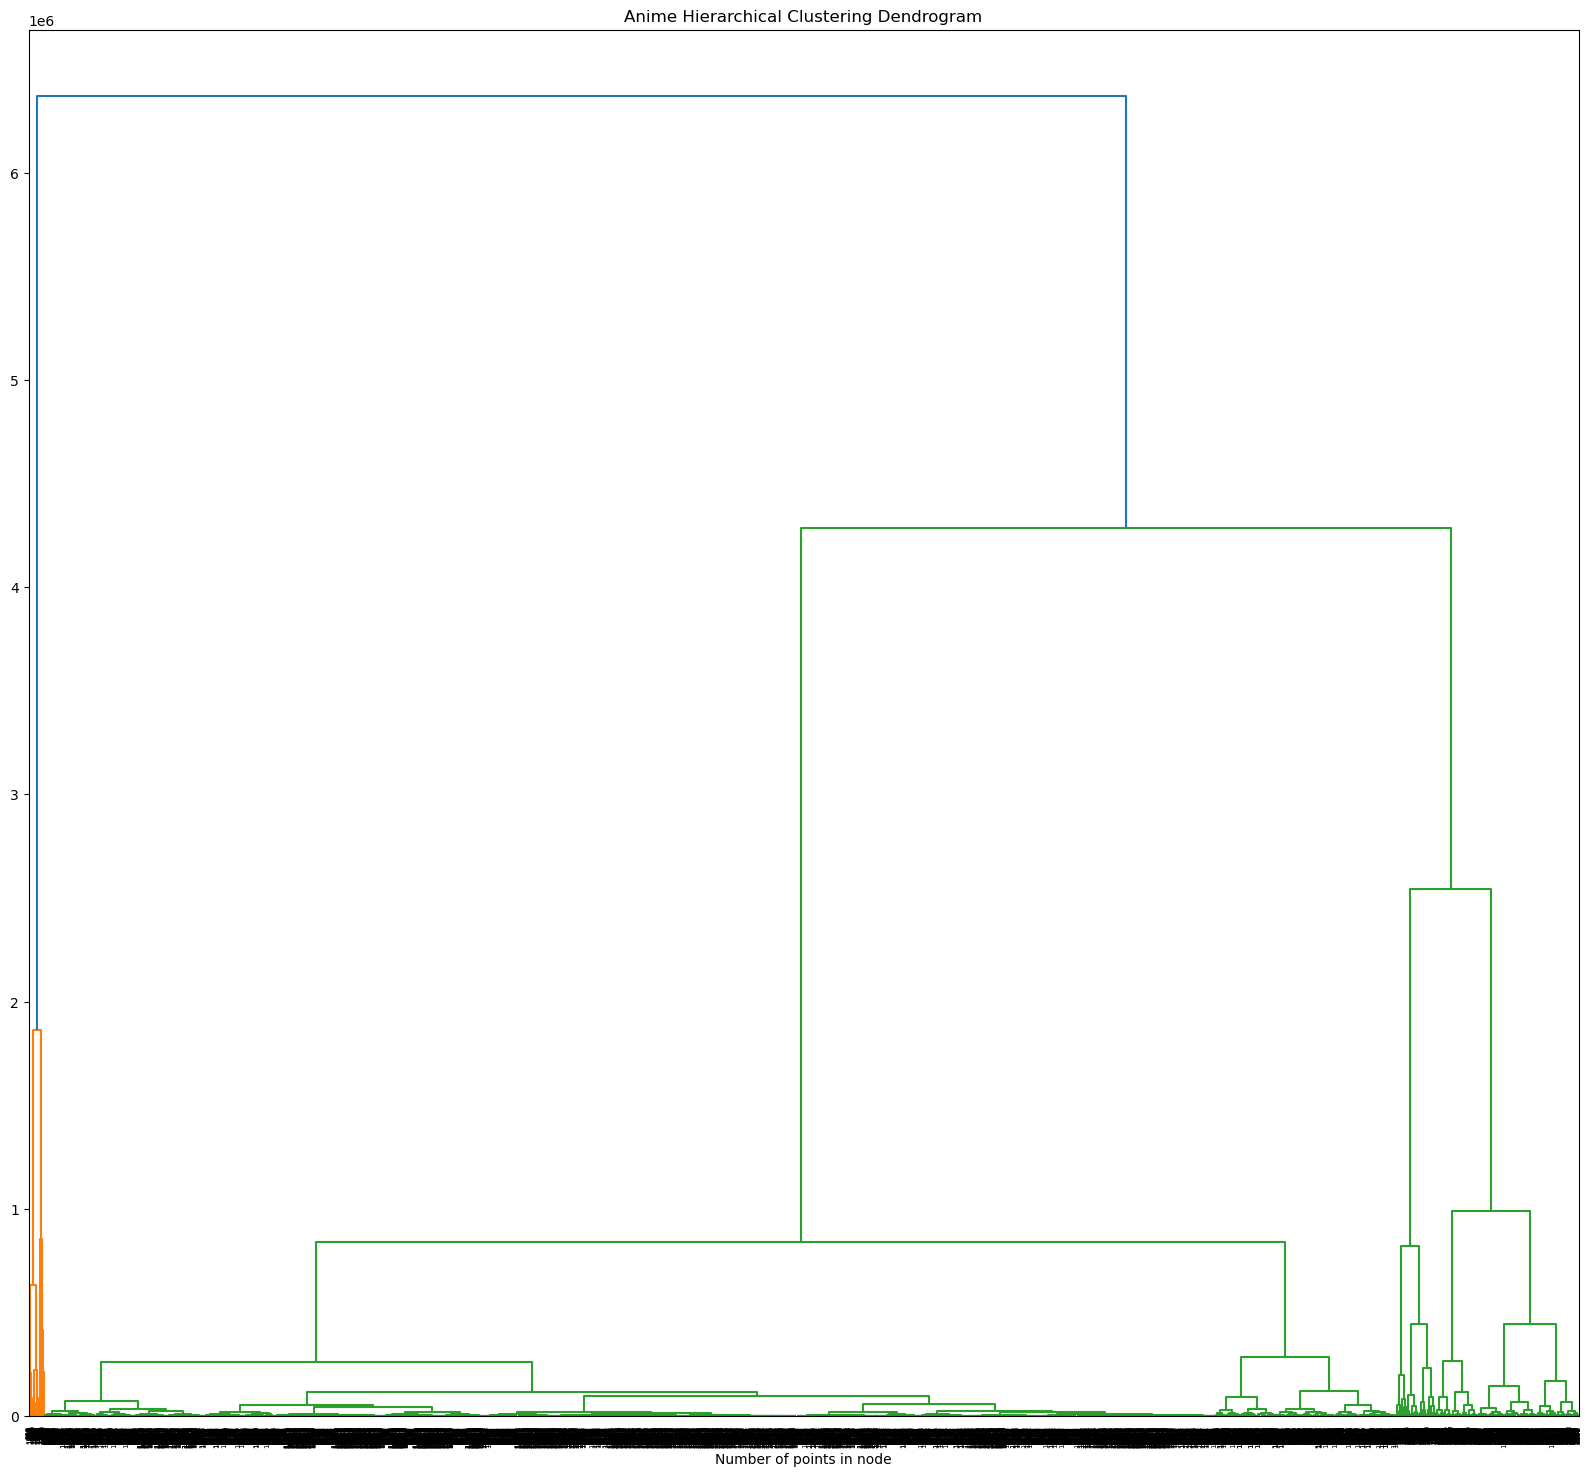

In [122]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(anime2) # to find the number of cluster

plt.figure(figsize=(20, 18))
plot_dendrogram(clustering)
plt.title("Anime Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node")
plt.show()